# Outlier Detection of 4 Digit MWC 4 Players using Tournament Scores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from utils.lof import LOF
from utils.metrics import nan_euclidean, elastic_nan_euclidean
from utils import get_table_players

In [3]:
from utils import Dataset

In [4]:
euclidean_regularized = elastic_nan_euclidean(1, 0.5, 0.5)
euclidean_ridge = elastic_nan_euclidean(1, 0.5, 0)
euclidean_lasso = elastic_nan_euclidean(1, 0, 0.5)

In [5]:
_4dm4_impute = Dataset('datasets/4dm4.db')

In [6]:
_4dm4_data = _4dm4_impute.select('scores', columns=['player_name', 'round', 'beatmap_type', 'beatmap_tag', 'score_logit'], where={
    'beatmap_type': ['LN', 'RC', 'HB'],
})

In [7]:
_4dm4_table = get_table_players(_4dm4_data)

In [8]:
standardized_4dm = pd.DataFrame(index=_4dm4_table.index)

In [9]:
for col in _4dm4_table.columns:
    mu = np.nanmean(_4dm4_table[col]); sigma = np.nanstd(_4dm4_table[col], ddof=1)
    standardized_4dm[col] = _4dm4_table[col].apply(lambda x: (x - mu) / sigma)

In [10]:
standardized_4dm.head()

,Q_RC_1,Q_RC_2,Q_LN_1,Q_HB_1,RO32_RC_1,RO32_RC_4,RO32_RC_5,RO32_LN_3,RO32_HB_1,RO16_RC_1,...,GF_RC_7,GF_LN_2,GF_LN_3,GF_LN_4,GF_HB_1,GF_HB_2,GF_HB_3,SF_RC_2,SF_HB_3,GF_RC_3
drag_,-1.271311,-0.888601,-0.288915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JPBenedictGame,-0.133422,0.052810,-0.519245,-0.407806,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iVALORUS,-2.538866,-1.609407,-2.138151,-1.485972,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BL5,0.293309,-0.947536,0.162731,0.073857,-1.536132,-1.589838,-0.170574,-0.071868,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Tebo-,0.427527,-0.009594,0.551290,-0.779546,0.079211,1.000453,0.577630,0.090251,0.900541,0.542193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Implementing the Local Outlier Factor Model

We then declare the model with n_neighbors (k) = 5 and use our defined Elastic Euclidean Distance as a Metric

In [11]:
lof_elastic = LOF(5, euclidean_regularized)
lof_ridge = LOF(5, euclidean_ridge)
lof_lasso = LOF(5, euclidean_lasso)
lof_euclidean = LOF(5, nan_euclidean)

We then train and predict the Local Outlier Factor of each player, stored in `lof_values`

In [12]:
lof_euclid_values = lof_euclidean.fit_predict(standardized_4dm.values)
lof_ridge_values = lof_ridge.fit_predict(standardized_4dm.values)
lof_lasso_values = lof_lasso.fit_predict(standardized_4dm.values)
lof_elastic_values = lof_elastic.fit_predict(standardized_4dm.values)

Then we map those in a `DataFrame` in order to assign players their Local Outlier Factors

In [13]:
lof_4dm = pd.DataFrame(index=standardized_4dm.index)

lof_4dm['lof_euclid'] = lof_euclid_values
lof_4dm['lof_ridge'] = lof_ridge_values
lof_4dm['lof_lasso'] = lof_lasso_values
lof_4dm['lof_elastic'] = lof_elastic_values

In [14]:
lof_4dm.sort_values(by='lof_ridge', ascending=False).head(16)['lof_ridge']

shokoha          13.399689
Ricizus          12.148859
[LS]Byte         10.656367
RaGe Radical      7.438198
MisteurFR         6.071382
D4SHI             5.520547
[LS]Taylor        5.334265
Lazereed          5.186512
dsdsdd            5.087730
Kaito-kun         4.624603
Micleak           4.496794
Gray Hardrock     4.201831
henryalexbr       4.172236
Maykee kee        4.038000
nanonbandusty     4.022055
HD_AdreNaline     3.602723
Name: lof_ridge, dtype: float64

In [15]:
lof_4dm.sort_values(by='lof_lasso', ascending=False).head(16)['lof_lasso']

shokoha          10.322487
[LS]Byte          8.826458
RaGe Radical      7.451943
Ricizus           6.676363
MisteurFR         6.436155
Lazereed          5.649100
Gray Hardrock     5.634206
henryalexbr       5.143083
Maykee kee        4.748086
Micleak           4.539347
[LS]Taylor        4.535293
nanonbandusty     4.322709
Kamikho           4.067353
Keskidi           4.034593
Zergh             3.663438
acolyde           3.563303
Name: lof_lasso, dtype: float64

In [16]:
lof_4dm.sort_values(by='lof_elastic', ascending=False).head(16)['lof_elastic']

shokoha          12.098435
[LS]Byte          9.602242
Ricizus           9.412435
RaGe Radical      7.369150
MisteurFR         6.218913
Lazereed          5.339418
[LS]Taylor        4.777246
Gray Hardrock     4.626604
henryalexbr       4.539259
Micleak           4.456546
D4SHI             4.366077
Maykee kee        4.298189
nanonbandusty     4.132222
Kaito-kun         3.690273
dsdsdd            3.591697
Keskidi           3.506828
Name: lof_elastic, dtype: float64

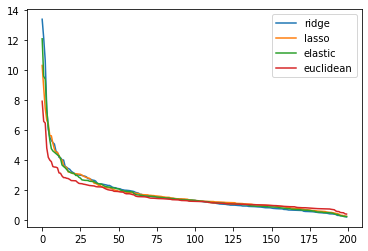

In [17]:
l_ridge = lof_4dm.sort_values(by='lof_ridge', ascending=False)['lof_ridge'].values
l_lasso = lof_4dm.sort_values(by='lof_lasso', ascending=False)['lof_lasso'].values
l_elastic = lof_4dm.sort_values(by='lof_elastic', ascending=False)['lof_elastic'].values
l_euclid = lof_4dm.sort_values(by='lof_euclid', ascending=False)['lof_euclid'].values
plt.plot(l_ridge, label="ridge")
plt.plot(l_lasso, label="lasso")
plt.plot(l_elastic, label="elastic")
plt.plot(l_euclid, label="euclidean")
plt.legend()
plt.show()

<AxesSubplot:>

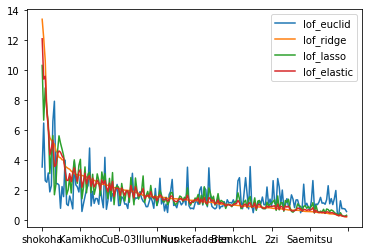

In [18]:
lof_4dm.sort_values(by='lof_ridge', ascending=False).plot()

<AxesSubplot:>

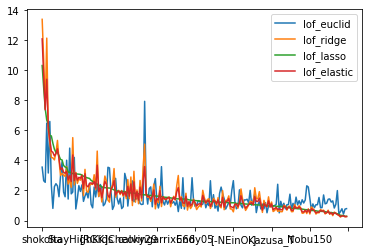

In [19]:
lof_4dm.sort_values(by='lof_lasso', ascending=False).plot()

<AxesSubplot:>

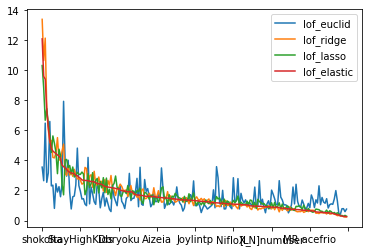

In [20]:
lof_4dm.sort_values(by='lof_elastic', ascending=False).plot()

<AxesSubplot:>

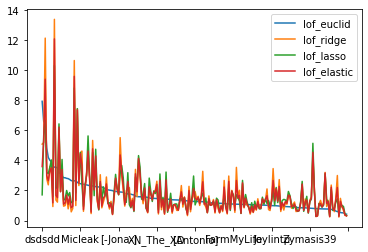

In [21]:
lof_4dm.sort_values(by='lof_euclid', ascending=False).plot()

In [22]:
log_euclid = np.log(lof_4dm['lof_euclid'])
log_ridge = np.log(lof_4dm['lof_ridge'])
log_lasso = np.log(lof_4dm['lof_lasso'])
log_elastic = np.log(lof_4dm['lof_elastic'])

(array([ 5.,  7., 41., 58., 35., 29., 14.,  7.,  1.,  3.]),
 array([-0.8608388 , -0.56757899, -0.27431917,  0.01894064,  0.31220045,
         0.60546026,  0.89872007,  1.19197988,  1.4852397 ,  1.77849951,
         2.07175932]),
 <BarContainer object of 10 artists>)

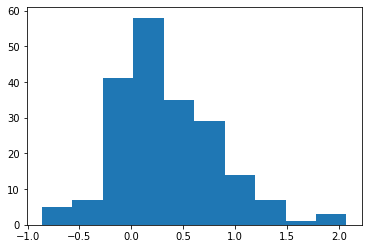

In [23]:
plt.hist(log_euclid)

(array([ 7., 12., 27., 42., 48., 29., 20., 10.,  2.,  3.]),
 array([-1.45809363, -1.05276112, -0.64742861, -0.2420961 ,  0.16323641,
         0.56856892,  0.97390143,  1.37923394,  1.78456646,  2.18989897,
         2.59523148]),
 <BarContainer object of 10 artists>)

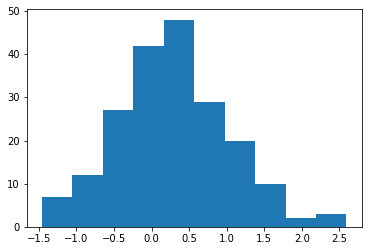

In [24]:
plt.hist(log_ridge)

(array([ 5.,  9., 22., 37., 57., 34., 19.,  9.,  5.,  3.]),
 array([-1.28752976, -0.92534431, -0.56315887, -0.20097342,  0.16121203,
         0.52339748,  0.88558292,  1.24776837,  1.60995382,  1.97213927,
         2.33432471]),
 <BarContainer object of 10 artists>)

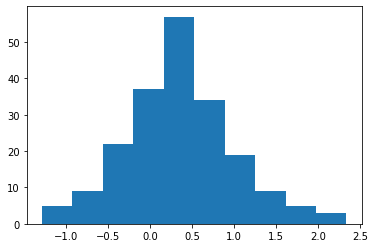

In [25]:
plt.hist(log_lasso)

(array([ 6., 11., 24., 49., 49., 27., 21.,  8.,  2.,  3.]),
 array([-1.36071966, -0.97534008, -0.58996051, -0.20458094,  0.18079863,
         0.5661782 ,  0.95155778,  1.33693735,  1.72231692,  2.10769649,
         2.49307606]),
 <BarContainer object of 10 artists>)

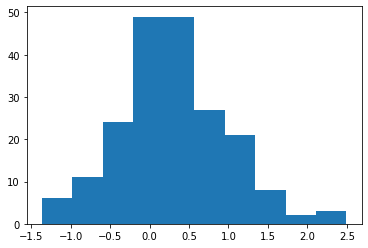

In [26]:
plt.hist(log_elastic)

In [27]:
from scipy.stats import shapiro

print("log euclid shapiro", shapiro(log_euclid))
# there is no turning back, I have committed a normal distribution
print("log ridge shapiro", shapiro(log_ridge))
print("log lasso shapiro", shapiro(log_lasso))
print("log elastic shapiro", shapiro(log_elastic))

log euclid shapiro ShapiroResult(statistic=0.9704585075378418, pvalue=0.0003216124896425754)
log ridge shapiro ShapiroResult(statistic=0.9915374517440796, pvalue=0.2958729863166809)
log lasso shapiro ShapiroResult(statistic=0.9872885346412659, pvalue=0.0704554095864296)
log elastic shapiro ShapiroResult(statistic=0.9896725416183472, pvalue=0.15998244285583496)


In [28]:
right_ol_lof_ridge = np.mean(log_ridge) + 1.645 * np.std(log_ridge, ddof=1)
right_ol_lof_lasso = np.mean(log_lasso) + 1.645 * np.std(log_lasso, ddof=1)
right_ol_lof_elastic = np.mean(log_elastic) + 1.645 * np.std(log_elastic, ddof=1)

right_ol_lof_ridge, right_ol_lof_lasso, right_ol_lof_elastic

(1.4876315217396843, 1.4067615832539901, 1.4220786673392827)

In [29]:
lof_4dm['log_ridge'] = log_ridge
lof_4dm['log_lasso'] = log_lasso
lof_4dm['log_elastic'] = log_elastic

In [30]:
lof_4dm[['log_ridge']][lof_4dm['log_ridge'] > right_ol_lof_ridge].sort_values(by='log_ridge', ascending=False)

,log_ridge
shokoha,2.595231
Ricizus,2.497235
[LS]Byte,2.366158
RaGe Radical,2.006629
MisteurFR,1.803586
D4SHI,1.708477
[LS]Taylor,1.674151
Lazereed,1.646061
dsdsdd,1.626832
Kaito-kun,1.531390


In [31]:
lof_4dm[['log_lasso']][lof_4dm['log_lasso'] > right_ol_lof_lasso].sort_values(by='log_lasso', ascending=False)

,log_lasso
shokoha,2.334325
[LS]Byte,2.177754
RaGe Radical,2.008475
Ricizus,1.898573
MisteurFR,1.861931
Lazereed,1.731496
Gray Hardrock,1.728856
henryalexbr,1.637653
Maykee kee,1.557742
Micleak,1.512783


In [32]:
lof_4dm[['log_elastic']][lof_4dm['log_elastic'] > right_ol_lof_elastic].sort_values(by='log_elastic', ascending=False)

,log_elastic
shokoha,2.493076
[LS]Byte,2.261997
Ricizus,2.242032
RaGe Radical,1.997302
MisteurFR,1.827595
Lazereed,1.675117
[LS]Taylor,1.563864
Gray Hardrock,1.531823
henryalexbr,1.512764
Micleak,1.494374
